In [1]:
import os
os.environ['HDF5_DISABLE_VERSION_CHECK']='1'
import tensorflow as tf
import keras

C:\Users\Admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\Admin\anaconda3\lib\site-packages\h5py\__init__.py:37: UserWarning: h5py is running against HDF5 1.10.5 when it was built against 1.10.4, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
Using TensorFlow backend.


In [2]:
import pandas as pd
import numpy as np

df_t = pd.read_excel("./data/bitcoin_2020_2022.xlsx")

In [3]:
pd.options.display.max_colwidth = 200
pd.options.display.max_columns = 100

In [4]:
df_t

,conversationId,coordinates,date,dict,hashtags,id,id_str,inReplyToTweetId,inReplyToUser,json,lang,likeCount,links,media,mentionedUsers,parse,place,quoteCount,quotedTweet,rawContent,replyCount,retweetCount,retweetedTweet,source,sourceLabel,sourceUrl,url,user,viewCount,d
0,1215785376289213952,NaN,2020-01-10 23:59:56,"<bound method JSONTrait.dict of Tweet(id=1215785376289214464, id_str='1215785376289214464', url='https://twitter.com/CryptoStatsBot/status/1215785376289214464', date=datetime.datetime(2020, 1, 10,...",[],1215785376289213952,1215785376289214464,NaN,NaN,"<bound method JSONTrait.json of Tweet(id=1215785376289214464, id_str='1215785376289214464', url='https://twitter.com/CryptoStatsBot/status/1215785376289214464', date=datetime.datetime(2020, 1, 10,...",en,0,[],"Media(photos=[], videos=[], animated=[])",[],<function Tweet.parse at 0x0000018EBA56BD90>,NaN,0,NaN,📈 Biggest Gainers (1 hr) 📈\nBitcoin SV $BSV 12.2% 🔥🔥\nMINDOL $MIN 7.44% 🔥\nBitcoin Diamond $BCD 4.92% 🔥\nBitcoin Cash $BCH 3.48% 🔥\nEthereum Classic $ETC 3.03% 🔥,0,0,NaN,"<a href=""https://twitter.com/cryptostatsbot"" rel=""nofollow"">Crypto Stats Bot</a>",Crypto Stats Bot,https://twitter.com/cryptostatsbot,https://twitter.com/CryptoStatsBot/status/1215785376289214464,"User(id=947953619726360576, id_str='947953619726360576', url='https://twitter.com/CryptoStatsBot', username='CryptoStatsBot', displayname='Crypto Stats Bot', rawDescription='#1 #Crypto Bot | Updat...",NaN,2020-01-10
1,1215785352813797120,NaN,2020-01-10 23:59:50,"<bound method JSONTrait.dict of Tweet(id=1215785352813797376, id_str='1215785352813797376', url='https://twitter.com/Juez_Jurado/status/1215785352813797376', date=datetime.datetime(2020, 1, 10, 23...",[],1215785352813797120,1215785352813797376,NaN,NaN,"<bound method JSONTrait.json of Tweet(id=1215785352813797376, id_str='1215785352813797376', url='https://twitter.com/Juez_Jurado/status/1215785352813797376', date=datetime.datetime(2020, 1, 10, 23...",es,0,"[TextLink(url='https://www.flipa.net/bitcoin-creador-y-para-que-sirve/', text='flipa.net/bitcoin-creado…', tcourl='https://t.co/S7pTispSTR')]","Media(photos=[], videos=[], animated=[])",[],<function Tweet.parse at 0x0000018EBA56BD90>,NaN,0,NaN,🎱 Bitcoin: quién es el creador y para qué sirve... https://t.co/S7pTispSTR,0,0,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Twitter Web Client,http://twitter.com,https://twitter.com/Juez_Jurado/status/1215785352813797376,"User(id=342756613, id_str='342756613', url='https://twitter.com/Juez_Jurado', username='Juez_Jurado', displayname='Juez y Jurado', rawDescription='La vida nos obliga a tomar decisiones en segundos...",NaN,2020-01-10
2,1215526980449254912,NaN,2020-01-10 23:59:48,"<bound method JSONTrait.dict of Tweet(id=1215785342084820992, id_str='1215785342084820992', url='https://twitter.com/StraightUpXRP/status/1215785342084820992', date=datetime.datetime(2020, 1, 10, ...",[],1215785342084820992,1215785342084820992,1.215784e+18,NaN,"<bound method JSONTrait.json of Tweet(id=1215785342084820992, id_str='1215785342084820992', url='https://twitter.com/StraightUpXRP/status/1215785342084820992', date=datetime.datetime(2020, 1, 10, ...",en,0,[],"Media(photos=[], videos=[], animated=[])","[UserRef(id=17023078, username='HammerToe', displayname='Matt Hamilton', _type='snscrape.modules.twitter.UserRef'), UserRef(id=1154001067534774275, username='parman_the', displayname='Parman⚡activ...",<function Tweet.parse at 0x0000018EBA56BD90>,NaN,0,NaN,@Tobin_Dash @HammerToe @Bitcoin_Gyp @parman_the @PacVotan @XRPBallzD33p @elonmusk Cause he is a “down with banks guy” a.k.a. “dreamer”,0,0,NaN,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Twitter for iPhone,http://twitter.com/download/iphone,https://twitter.com/StraightUpXRP/status/1215785342084820992,"User(id=3387817821, id_str='3387817821', url='https://twitter.com/StraightUpXRP', username='StraightUpXRP', displayname='$𝖙𝖗𝖆𝖎𝖌𝖍𝖙 𝖚𝖕 ⓧⓡⓟ🚀🌖🪝🏴\u200

In [5]:
df_a = df_t.groupby('d')[['conversationId','viewCount','replyCount','retweetCount','likeCount']].agg(
    {"conversationId": 'nunique', 
     "viewCount": np.sum,
    "replyCount": np.sum,
    "retweetCount": np.sum,
    "likeCount": np.sum}).reset_index()

In [6]:
df_a

,d,conversationId,viewCount,replyCount,retweetCount,likeCount
0,2018-03-12,1,0.0,7,24,82
1,2020-01-10,18,0.0,9,24,127
2,2020-01-20,17,0.0,20,47,360
3,2020-01-30,16,0.0,1,4,24
4,2020-02-03,1,0.0,76,884,797
...,...,...,...,...,...,...
129,2022-12-08,1,0.0,1,0,5
130,2022-12-15,26,2356.0,1,1,14
131,2022-12-25,22,495723.0,501,472,2571
132,2023-01-03,1,3786.0,7,21,29


In [7]:
import pandas as pd
import numpy as np

df_b = pd.read_excel("./data/btc_price.xlsx")

In [8]:
df_b

,Unnamed: 0,Open,High,Low,Close,Timestamp
0,0,4261.48,4485.39,4200.74,4285.08,2017-08-17 07:00:00
1,1,4285.08,4371.52,3938.77,4108.37,2017-08-18 07:00:00
2,2,4108.37,4184.69,3850.00,4139.98,2017-08-19 07:00:00
3,3,4120.98,4211.08,4032.62,4086.29,2017-08-20 07:00:00
4,4,4069.13,4119.62,3911.79,4016.00,2017-08-21 07:00:00
...,...,...,...,...,...,...
2336,2336,46951.04,47972.00,44748.67,46110.00,2024-01-09 07:00:00
2337,2337,46110.00,47695.93,44300.36,46653.99,2024-01-10 07:00:00
2338,2338,46654.00,48969.48,45606.06,46339.16,2024-01-11 07:00:00
2339,2339,46339.16,46515.53,41500.00,42782.73,2024-01-12 07:00:00


In [9]:
df_b['d'] = pd.to_datetime(df_b['Timestamp']).dt.date

In [10]:
df_a['d'] = pd.to_datetime(df_a['d'])
df_b['d'] = pd.to_datetime(df_b['d'])

In [11]:
df_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  2341 non-null   int64         
 1   Open        2341 non-null   float64       
 2   High        2341 non-null   float64       
 3   Low         2341 non-null   float64       
 4   Close       2341 non-null   float64       
 5   Timestamp   2341 non-null   datetime64[ns]
 6   d           2341 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1)
memory usage: 128.1 KB


In [12]:
df = pd.merge(df_a, df_b[['d','Close']], on = 'd', how='left')

# Model

In [13]:
df = df.set_index('d')

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df.values)

In [15]:
pd.DataFrame(scaled)

,0,1,2,3,4,5
0,0.000000,0.000000,0.000184,0.001598,0.000555,0.072090
1,0.548387,0.000000,0.000237,0.001598,0.000860,0.056539
2,0.516129,0.000000,0.000526,0.003129,0.002438,0.063951
3,0.483871,0.000000,0.000026,0.000266,0.000163,0.078446
4,0.000000,0.000000,0.001997,0.058859,0.005397,0.074768
...,...,...,...,...,...,...
129,0.000000,0.000000,0.000026,0.000000,0.000034,0.206784
130,0.806452,0.004753,0.000026,0.000067,0.000095,0.208985
131,0.677419,1.000000,0.013167,0.031427,0.017408,0.200260
132,0.000000,0.007637,0.000184,0.001398,0.000196,0.197648


In [16]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    '''
    Converts the original dataframe to a format which contains
    lag shifted values of inputs which can be used as input
    to the LSTM
    '''
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [17]:
n_days = 1  #no of time lags
n_features = 5 #no of features
n_obs = n_days*n_features

In [18]:
n_obs

5

In [19]:
reframed = series_to_supervised(scaled, n_days, 1, 1)
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
1,0.000000,0.000000,0.000184,0.001598,0.000555,0.072090,0.548387,0.000000,0.000237,0.001598,0.000860,0.056539
2,0.548387,0.000000,0.000237,0.001598,0.000860,0.056539,0.516129,0.000000,0.000526,0.003129,0.002438,0.063951
3,0.516129,0.000000,0.000526,0.003129,0.002438,0.063951,0.483871,0.000000,0.000026,0.000266,0.000163,0.078446
4,0.483871,0.000000,0.000026,0.000266,0.000163,0.078446,0.000000,0.000000,0.001997,0.058859,0.005397,0.074768
5,0.000000,0.000000,0.001997,0.058859,0.005397,0.074768,0.838710,0.000000,0.000631,0.005526,0.001991,0.089073
...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.612903,0.000000,0.000210,0.000533,0.000420,0.202494,0.000000,0.000000,0.000026,0.000000,0.000034,0.206784
130,0.000000,0.000000,0.000026,0.000000,0.000034,0.206784,0.806452,0.004753,0.000026,0.000067,0.000095,0.208985
131,0.806452,0.004753,0.000026,0.000067,0.000095,0.208985,0.677419,1.000000,0.013167,0.031427,0.017408,0.200260
132,0.677419,1.000000,0.013167,0.031427,0.017408,0.200260,0.000000,0.007637,0.000184,0.001398,0.000196,0.197648


In [20]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
1,0.000000,0.000000,0.000184,0.001598,0.000555,0.072090,0.548387,0.000000,0.000237,0.001598,0.000860,0.056539
2,0.548387,0.000000,0.000237,0.001598,0.000860,0.056539,0.516129,0.000000,0.000526,0.003129,0.002438,0.063951
3,0.516129,0.000000,0.000526,0.003129,0.002438,0.063951,0.483871,0.000000,0.000026,0.000266,0.000163,0.078446
4,0.483871,0.000000,0.000026,0.000266,0.000163,0.078446,0.000000,0.000000,0.001997,0.058859,0.005397,0.074768
5,0.000000,0.000000,0.001997,0.058859,0.005397,0.074768,0.838710,0.000000,0.000631,0.005526,0.001991,0.089073
...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.612903,0.000000,0.000210,0.000533,0.000420,0.202494,0.000000,0.000000,0.000026,0.000000,0.000034,0.206784
130,0.000000,0.000000,0.000026,0.000000,0.000034,0.206784,0.806452,0.004753,0.000026,0.000067,0.000095,0.208985
131,0.806452,0.004753,0.000026,0.000067,0.000095,0.208985,0.677419,1.000000,0.013167,0.031427,0.017408,0.200260
132,0.677419,1.000000,0.013167,0.031427,0.017408,0.200260,0.000000,0.007637,0.000184,0.001398,0.000196,0.197648


In [21]:
values = reframed.values
n_train_days = round(len(df)*0.7)
train = values[:n_train_days, :]
test = values[n_train_days:, :]
train.shape

(94, 12)

In [22]:
test[:,-1]

array([0.58543637, 0.6384562 , 0.57624167, 0.6068681 , 0.70350001,
       0.63169832, 0.61071398, 0.56249572, 0.42069387, 0.42682911,
       0.42473698, 0.41057094, 0.42283193, 0.2596651 , 0.23585581,
       0.25766751, 0.27952847, 0.29347315, 0.31694673, 0.30581969,
       0.32113914, 0.30862034, 0.25361158, 0.24960442, 0.23285693,
       0.24971194, 0.24013376, 0.25233117, 0.24071896, 0.26582796,
       0.27461223, 0.20139948, 0.19510096, 0.20249431, 0.20678425,
       0.20898522, 0.20026004, 0.19764813, 0.20056379])

In [23]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t)
1,0.000000,0.000000,0.000184,0.001598,0.000555,0.072090,0.548387,0.000000,0.000237,0.001598,0.000860,0.056539
2,0.548387,0.000000,0.000237,0.001598,0.000860,0.056539,0.516129,0.000000,0.000526,0.003129,0.002438,0.063951
3,0.516129,0.000000,0.000526,0.003129,0.002438,0.063951,0.483871,0.000000,0.000026,0.000266,0.000163,0.078446
4,0.483871,0.000000,0.000026,0.000266,0.000163,0.078446,0.000000,0.000000,0.001997,0.058859,0.005397,0.074768
5,0.000000,0.000000,0.001997,0.058859,0.005397,0.074768,0.838710,0.000000,0.000631,0.005526,0.001991,0.089073
...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.612903,0.000000,0.000210,0.000533,0.000420,0.202494,0.000000,0.000000,0.000026,0.000000,0.000034,0.206784
130,0.000000,0.000000,0.000026,0.000000,0.000034,0.206784,0.806452,0.004753,0.000026,0.000067,0.000095,0.208985
131,0.806452,0.004753,0.000026,0.000067,0.000095,0.208985,0.677419,1.000000,0.013167,0.031427,0.017408,0.200260
132,0.677419,1.000000,0.013167,0.031427,0.017408,0.200260,0.000000,0.007637,0.000184,0.001398,0.000196,0.197648


In [24]:
# split into input and outputs
train_X, train_y = train[:, :n_obs], train[:, -1]
test_X, test_y = test[:, :n_obs], test[:, -1]

In [25]:
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_days, n_features))
test_X = test_X.reshape((test_X.shape[0], n_days, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(94, 1, 5) (94,) (39, 1, 5) (39,)


In [56]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
# from elephas.utils.rdd_utils import to_simple_rdd
# design network
model = Sequential()
model.add(LSTM(5, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', metrics=['mae', 'mse'],optimizer='adam')
# fit network

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.01, patience=50, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
history = model.fit(train_X, train_y, epochs=20, batch_size=4, validation_data=(test_X, test_y), callbacks=[callback])
# plot history|

Epoch 1/20
24/24 [==============================] - 2s 22ms/step - loss: 0.3534 - mae: 0.3534 - mse: 0.2244 - val_loss: 0.2594 - val_mae: 0.2594 - val_mse: 0.0886
Epoch 2/20
24/24 [==============================] - 0s 3ms/step - loss: 0.3706 - mae: 0.3706 - mse: 0.2171 - val_loss: 0.2177 - val_mae: 0.2177 - val_mse: 0.0688
Epoch 3/20
24/24 [==============================] - 0s 3ms/step - loss: 0.3111 - mae: 0.3111 - mse: 0.1730 - val_loss: 0.1947 - val_mae: 0.1947 - val_mse: 0.0594
Epoch 4/20
24/24 [==============================] - 0s 3ms/step - loss: 0.3642 - mae: 0.3642 - mse: 0.1915 - val_loss: 0.1687 - val_mae: 0.1687 - val_mse: 0.0499
Epoch 5/20
24/24 [==============================] - 0s 3ms/step - loss: 0.3185 - mae: 0.3185 - mse: 0.1610 - val_loss: 0.1495 - val_mae: 0.1495 - val_mse: 0.0428
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 0.3068 - mae: 0.3068 - mse: 0.1442 - val_loss: 0.1323 - val_mae: 0.1323 - val_mse: 0.0359
Epoch 7/20
24/24 [=========

In [57]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from keras.callbacks import EarlyStopping

In [58]:
import chart_studio as py
import plotly.offline as pyoff
import plotly.graph_objs as go
import matplotlib.pyplot as plt

Epochs min val_mae:
8


Text(0, 0.5, 'MAE [MPG]')

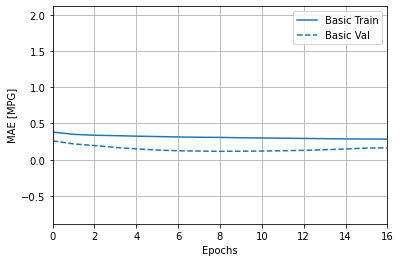

In [64]:
hist = pd.DataFrame(history.history)
a=hist.val_loss.min()
b=hist[hist.val_loss==a].reset_index()
c=b['index'].iloc[0]
print('Epochs min val_mae:')
print(hist[hist.val_loss==a].reset_index().iloc[0,0])
plotter = tfdocs.plots.HistoryPlotter()#smoothing_std=0.01)
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([a-1, a+2])
plt.xlim([c-c, c+c])
plt.ylabel('MAE [MPG]')